# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [466]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [467]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [468]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.mean((np.dot(X, w) - y) ** 2)
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """

        return (2/X.shape[0]) * np.dot(X.T ,(np.dot(X,w) - y))

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [469]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [470]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    weight_history = []
    w = w_init
    weight_history.append(w_init)
    
    for i in range(n_iterations):
        
        w = w - lr*loss.calc_grad(X, y, w)
        weight_history.append(w)
    
    return weight_history

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [471]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [472]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [473]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

 lr: 0.0005, loss_final: 7.032304203624178


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


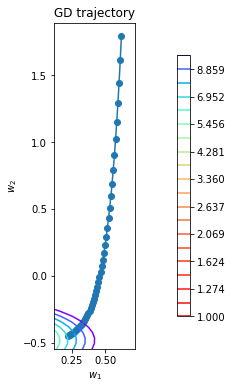

 lr: 0.005, loss_final: 0.871440774434999


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


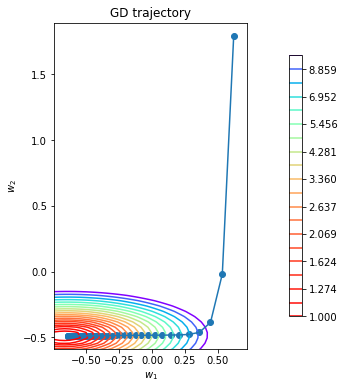

 lr: 0.05, loss_final: 8.379788101094454e+86


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


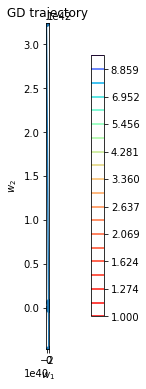

 lr: 0.09, loss_final: 1.367532078158718e+115


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


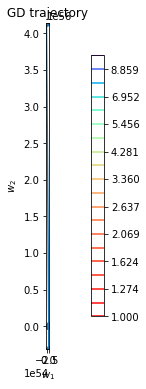

In [474]:
lr_list = [0.0005, 0.005, 0.05, 0.09]

for i in range(len(lr_list)):
    w_list = gradient_descent(w_init, X, y, loss, lr_list[i], 50)
    print(f" lr: {lr_list[i]}, loss_final: {loss.calc_loss(X, y, gradient_descent(w_init, X, y, loss, lr_list[i], 50)[-1])}" )
    plot_gd(w_list, X, y, loss)

Как мы видим, градиентный спуск сходится только lr = 0.005, при меньшей длине шага  gd не хватает итераций (мы взяли 50), при большей - расходится - лосс улетает в небеса 

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [475]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
    weight_history = []
    w = w_init
    weight_history.append(w)
    
    for i in range(n_iterations):
        
        w = w - lr*loss.calc_grad(X[batch_indices], y[batch_indices], w)
        weight_history.append(w)
    
    return weight_history

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

 lr: 0.0005
 batch_size: 1
loss_final: 96.76383476080194


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


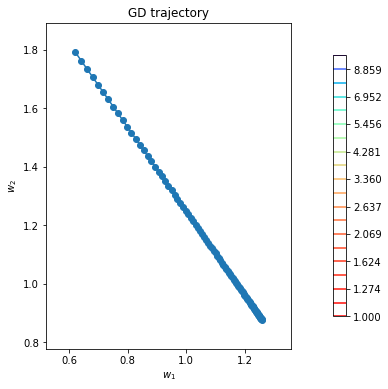

 lr: 0.0005
 batch_size: 5
loss_final: 5.332663322815841


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


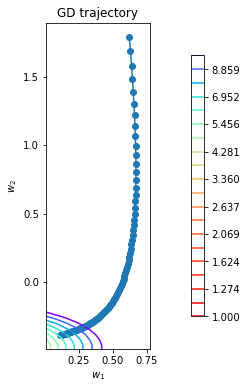

 lr: 0.0005
 batch_size: 20
loss_final: 3.017891517280213


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


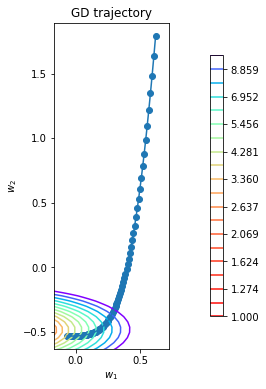

 lr: 0.0005
 batch_size: 50
loss_final: 5.125729904180488


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


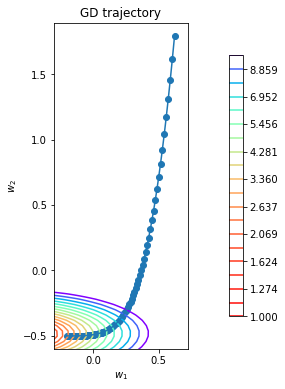

 lr: 0.005
 batch_size: 1
loss_final: 16.95326561558477


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


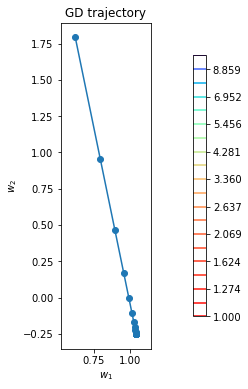

 lr: 0.005
 batch_size: 5
loss_final: 1.0103678797535336


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


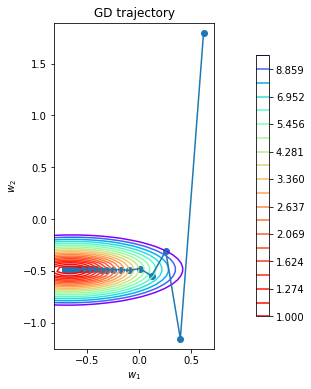

 lr: 0.005
 batch_size: 20
loss_final: 1.1792830983272957


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


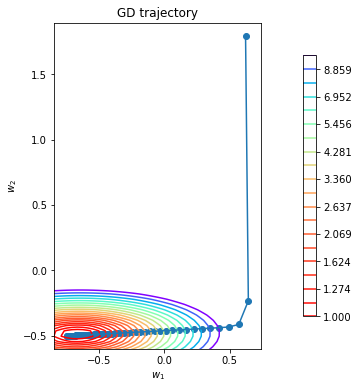

 lr: 0.005
 batch_size: 50
loss_final: 0.8843022663998823


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


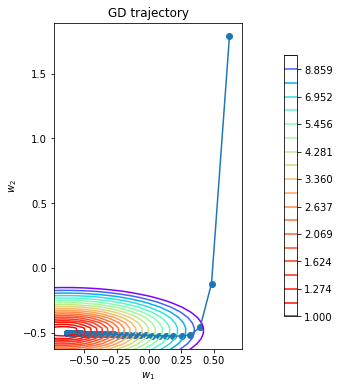

 lr: 0.05
 batch_size: 1
loss_final: 1.7838512261743845e+79


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


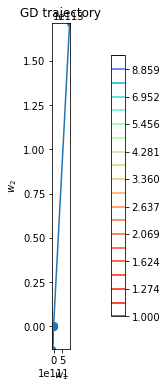

 lr: 0.05
 batch_size: 5
loss_final: 5.484818290102001e+185


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


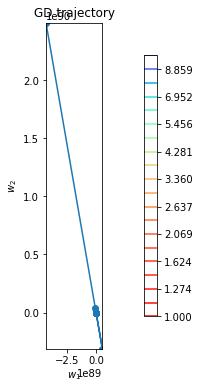

 lr: 0.05
 batch_size: 20
loss_final: 4.668914668953691e+181


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


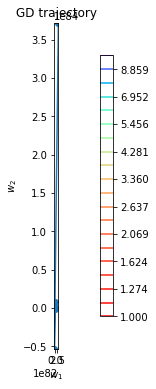

 lr: 0.05
 batch_size: 50
loss_final: 7.870860278080707e+189


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


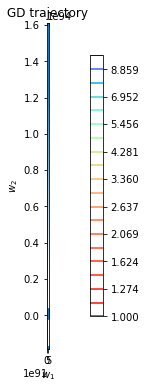

 lr: 0.09
 batch_size: 1
loss_final: 5.319671501441896e+232


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


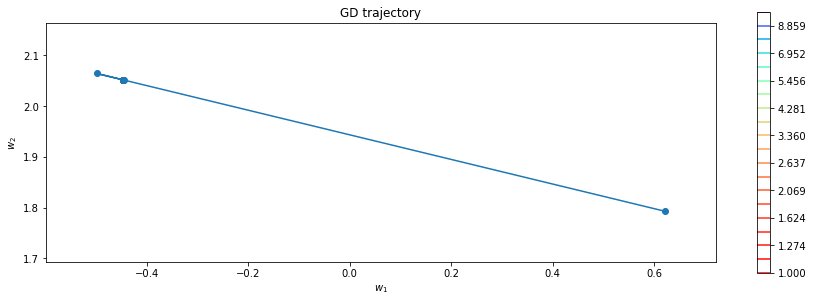

 lr: 0.09
 batch_size: 5
loss_final: 1.1608731120864058e+237


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


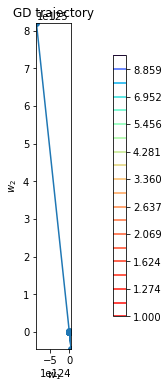

 lr: 0.09
 batch_size: 20
loss_final: 2.926778874315271e+244


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


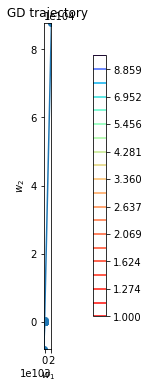

 lr: 0.09
 batch_size: 50
loss_final: 7.831120834037082e+231


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


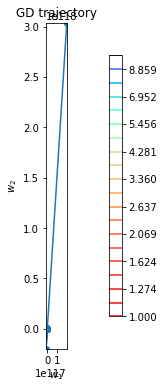

In [476]:
batch_size_list = [1, 5, 20, 50]
lr_list = [0.0005, 0.005, 0.05, 0.09]

for i in range(len(lr_list)):
    for q in range(len(batch_size_list)):
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr_list[i], batch_size_list[q], 100)
        print(f" lr: {lr_list[i]}") 
        print(f" batch_size: {batch_size_list[q]}") 
        print(f"loss_final: {loss.calc_loss(X, y, stochastic_gradient_descent(w_init, X, y, loss, lr_list[i], batch_size_list[q], 100)[-1])}")
        plot_gd(w_list, X, y, loss)

Оптимальным кажется снова lr = 0.005, при меньшей длине шага снова не хватает итераций до минимума, хотя теперь мы взяли 100 итераций. 
С оптимальным lr ведут себя удачно только относительно большие размеры batch, так как градиенты посчитанные по 1 или 5 точкам представляются нерепрезантативными, тогда как 20 и 50 batch_size отражают уже значительный процент выборки 

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [477]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
    weight_history = []
    w = w_init
    weight_history.append(w)
    s = 1
    
    for i in range(n_iterations):
        nu = lr*(s/(s+(i+1)))**p
        w = w - nu*loss.calc_grad(X[batch_indices], y[batch_indices], w)
        weight_history.append(w)
    
    return weight_history

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

 p: 0.1
loss_final: 1.136113554770318


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


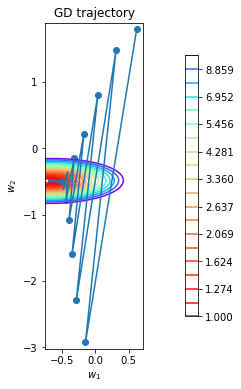

 p: 0.25
loss_final: 1.0174828713711042


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


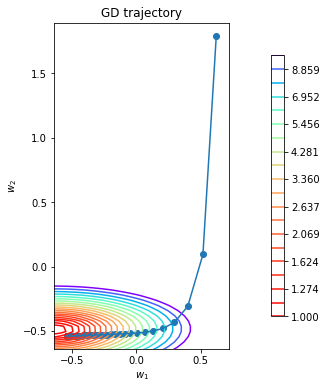

 p: 0.5
loss_final: 1.0127039154976416


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


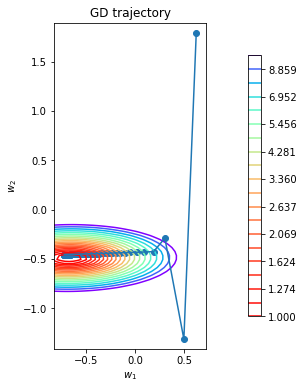

 p: 0.75
loss_final: 3.2055024168084767


<ipython-input-473-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


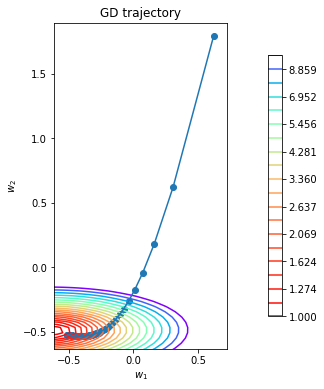

In [478]:
p_list = [0.1, 0.25, 0.5, 0.75]

for i in range(len(lr_list)):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p_list[i], 100)
    print(f" p: {p_list[i]}") 
    print(f"loss_final: {loss.calc_loss(X, y, stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p_list[i], 100)[-1])}")
    plot_gd(w_list, X, y, loss)

Чем больше параметр к единице, тем меньше "колбасит" gd на первых итерациях, но есть шанс не дойти до минимума при малом количестве итераций - у 0.75 самый большой финальный лосс

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

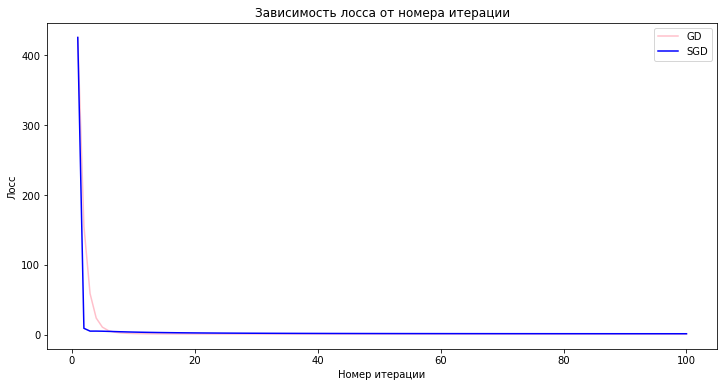

In [479]:
loss = MSELoss()
w_list_gd = gradient_descent(w_init, X, y, loss, 0.01, 100)
w_list_sgd = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.5, 100)

loss_history_gd = []
loss_history_sgd = []

for i in range(100):
    
    loss_history_gd.append(loss.calc_loss(X, y, w_list_gd[i]))
    loss_history_sgd.append(loss.calc_loss(X, y, w_list_sgd[i]))


fig, ax = plt.subplots(1, figsize = (12, 6))
ax.plot(np.arange(1, 101), loss_history_gd, color='pink', label='GD')
ax.plot(np.arange(1, 101), loss_history_sgd, color='blue', label='SGD')

ax.set(title = 'Зависимость лосса от номера итерации',
      xlabel = 'Номер итерации', ylabel = 'Лосс')
plt.legend(fontsize=10, loc='upper right')

plt.show()

Примерно до 5 итерации лосс gd больше чем у sgd, затем лосс gd становится незначительно меньше и выравнивается с sgd к 40 итерации

Преимущество sgd тут видно на первых итерациях, но кажется что такой график не может отобразить все преимущество sgd, которое заключается в гораздно более меньших вычислительных затратах, то есть один и тот же лосс gd и sgd на 40 итерации был достигнут гораздо меньшими затратами для sgd

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [480]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.random.normal(0, 1, X.shape[1])
        trajectory = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = trajectory[-1]
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [481]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [482]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [483]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [484]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

Пропуски

In [485]:
na = X_raw.isnull().any().values

for c in X_raw.columns[na]:
    print('Пропусков в столбце {}: {}'.format(c, np.sum(X_raw[c].isnull())))

Пропусков в столбце 1: 37
Пропусков в столбце 5: 2
Пропусков в столбце 18: 4
Пропусков в столбце 19: 4
Пропусков в столбце 21: 2
Пропусков в столбце 22: 2


Заполнение пропусков

In [486]:
imputer_mean = SimpleImputer(strategy="mean")

mask = (X_raw.dtypes == "object").values

X_real = X_raw[X_raw.columns[~mask]]
X_no_mis_real = pd.DataFrame(data=imputer_mean.fit_transform(X_real), columns=X_real.columns)

X_cat = X_raw[X_raw.columns[mask]].fillna('')
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)
X = X_no_mis

In [487]:
X.isnull().any().any()

False

Кодировка категориальных

In [488]:
X = pd.get_dummies(X, drop_first=True)

Разделение выборки

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,   shuffle=True,  random_state=314)

Нормализация

In [490]:
normalizer = MinMaxScaler()

X_train = pd.DataFrame(normalizer.fit_transform(X_train))
X_test = pd.DataFrame(normalizer.fit_transform(X_test))

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [491]:
lin_reg = LinearRegression(MSELoss())
lin_reg.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [492]:
from sklearn.metrics import mean_squared_error

print(f"mse_train: {mean_squared_error(y_train, lin_reg.predict(X_train))}, mse_test: {mean_squared_error(y_test, lin_reg.predict(X_test))}")

mse_train: 1645895.770901813, mse_test: 20290710.45556309


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [493]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return (1/X.shape[0]) * np.sum((y - np.dot(X, w)) ** 2) + self.coef*np.sum(w[0:-1]**2)
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2/X.shape[0]) * np.dot(X.T ,(np.dot(X,w) - y))+ 2*self.coef*np.hstack([w[0:-1], np.zeros([1, ])])

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [494]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [495]:
param = [0.01, 0.05, 0.1, 0.5, 1]
mse_ridge = {}

for i in range(len(param)):
    linear_regression = LinearRegression(MSEL2Loss(param[i]))
    linear_regression.fit(X_train, y_train)
    mse_ridge[mean_squared_error(y_train, linear_regression.predict(X_train))] = param[i]


print(f"best alpha: {mse_ridge[min(mse_ridge.keys())]}, mse_train_ridge: {min(mse_ridge.keys())}")
print()
linear_regression = LinearRegression(MSEL2Loss(mse_ridge[min(mse_ridge.keys())]))
print(f"mse_test_ridge: {mean_squared_error(y_test, linear_regression.fit(X_train, y_train).predict(X_test))}" )
print()
print(f"mse_train_lin: {mean_squared_error(y_train, lin_reg.predict(X_train))}, mse_test_lin: {mean_squared_error(y_test, lin_reg.predict(X_test))}")

best alpha: 0.01, mse_train_ridge: 4161658.396455029

mse_test_ridge: 6690632.249368276

mse_train_lin: 1645895.770901813, mse_test_lin: 20290710.45556309


l2 чуть менее успешна на трейне и гораздо более успешна на тесте

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [496]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        mask_eps = np.abs(np.dot(X, w) - y) < self.eps
        return   np.mean(np.where(mask_eps, 0.5 * (np.dot(X, w) - y) ** 2,
                          self.eps * (np.abs(np.dot(X, w) - y) - 0.5 * self.eps)))
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        
        mask_eps = np.abs(np.dot(X, w) - y) <= self.eps
        return np.dot(X, np.mean(np.where(mask_eps, np.dot(X, w) - y, self.eps * np.sign(np.dot(X, w) - y))).T).mean(axis=0)

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [497]:
param_hub = [5, 10, 50, 100, 150, 200, 250, 500, 10000]
mse_hub = {}

for i in range(len(param_hub)):
    hub_reg = LinearRegression(HuberLoss(param_hub[i]))
    hub_reg.fit(X_train, y_train)
    mse_hub[mean_squared_error(y_train, hub_reg.predict(X_train))] = param_hub[i]

print(f"best eps: {mse_hub[min(mse_hub.keys())]}, mse_train_hub: {min(mse_hub.keys())}")

hub_reg = LinearRegression(HuberLoss(mse_hub[min(mse_hub.keys())]))

print(f"mse_test_hub: {mean_squared_error(y_test, hub_reg.fit(X_train, y_train).predict(X_test))}" )
print()
print(f"mse_train_lin: {mean_squared_error(y_train, lin_reg.predict(X_train))}, mse_test_lin: {mean_squared_error(y_test, lin_reg.predict(X_test))}")

best eps: 10000, mse_train_hub: 69541133.67753364
mse_test_hub: 52778656.971928686

mse_train_lin: 1645895.770901813, mse_test_lin: 20290710.45556309


Huber показывает себя в целом хуже чем линейная модель и l2, но забавно, что Huber приближается к ним по мере увеличения eps - получаются выбросы очень влияют

In [498]:
mse_hub

{77112708.12620531: 5,
 77115879.70332497: 10,
 76851228.6905662: 50,
 76699201.05500388: 100,
 76705983.6731731: 150,
 76795652.28913182: 200,
 76827613.88237938: 250,
 76733138.7429545: 500,
 69541133.67753364: 10000}

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

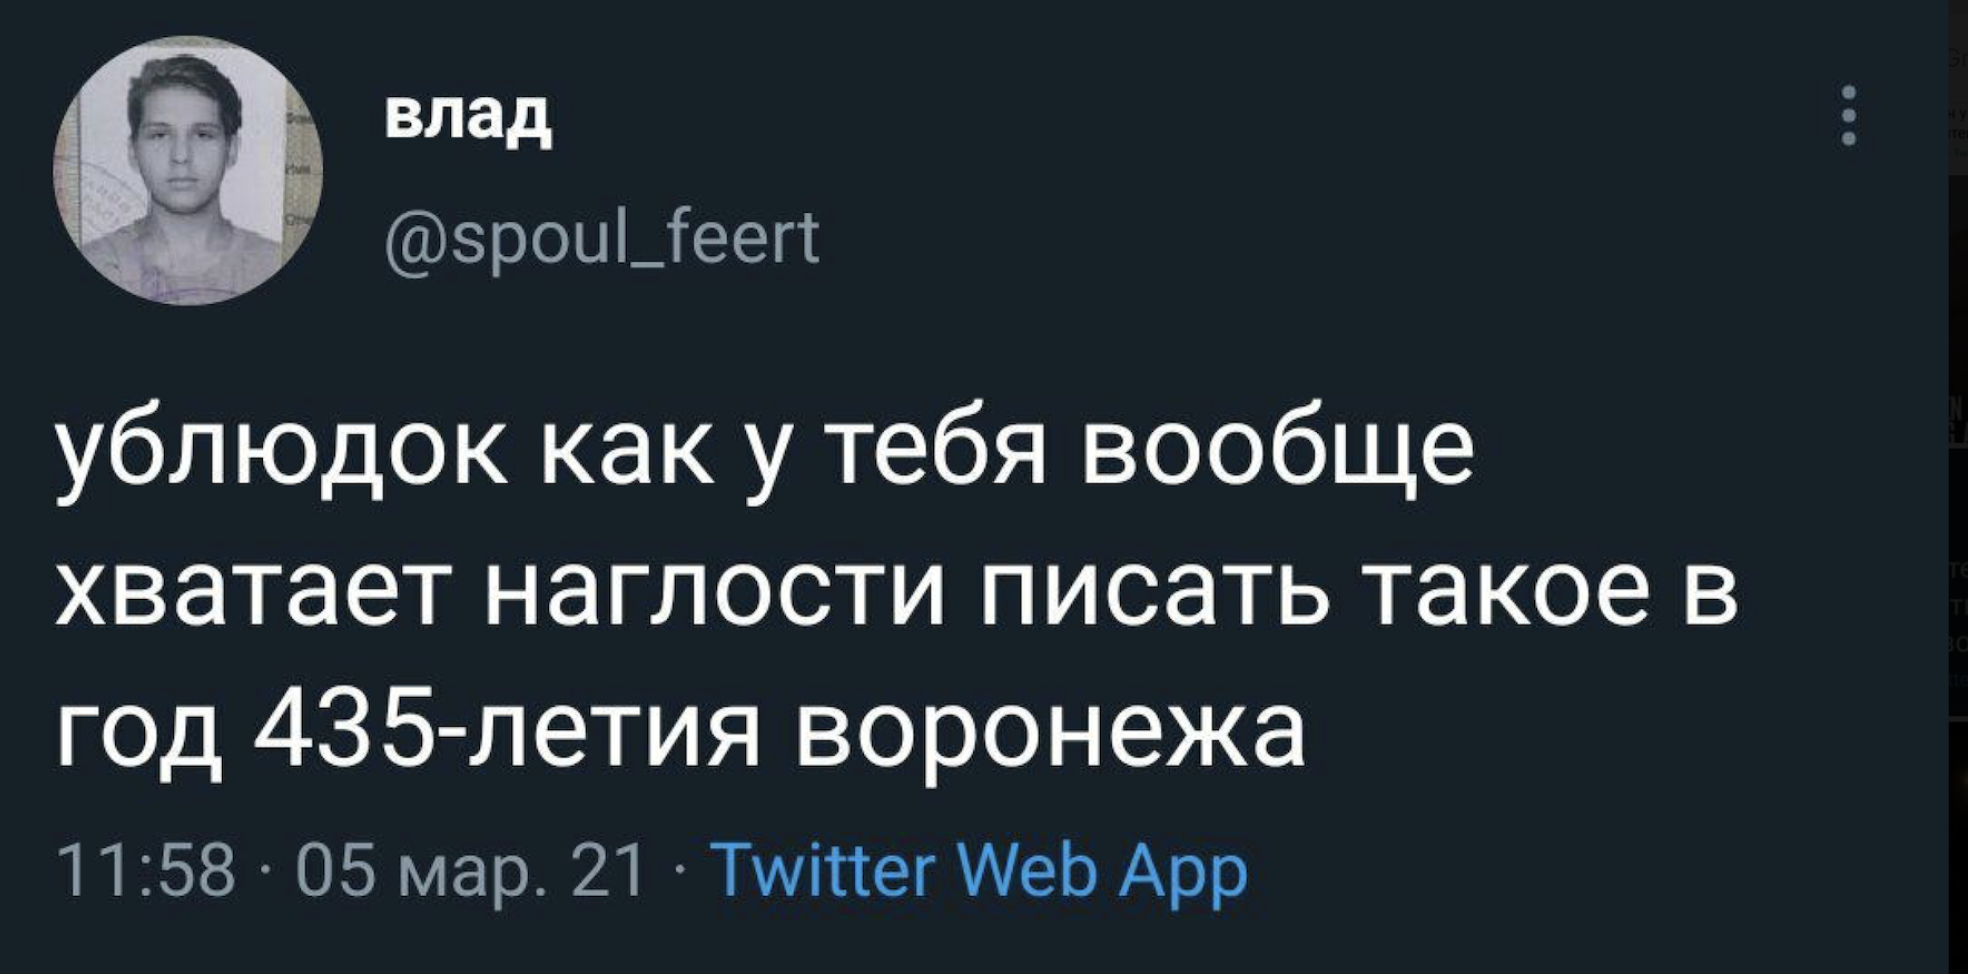

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [544]:
wg = 2
w_ne = wg + np.random.standard_t(1, size=X.shape[1])
w_ne

array([ 1.78076123e+00,  1.61470395e+00,  2.23127098e+00,  9.31940680e+00,
        2.44800266e+01, -1.04472171e+00,  1.57766629e+00,  1.23281939e+00,
       -7.41653270e-01, -2.42572765e+01,  1.75580631e+00,  1.12675917e+00,
        1.97748064e+00,  2.08218603e+00, -5.87498869e-01,  1.95451477e+00,
        1.59616260e-02,  8.53308616e+00,  2.55783936e+00,  3.07917093e+00,
        5.87979556e+00,  2.05965355e+00,  3.95247812e+00, -1.02689824e+00,
        3.57206950e+00,  1.62008302e+00,  2.18878344e+00,  3.28676123e+00,
        2.36047444e+00,  3.14463288e+00, -1.66100291e+00,  6.41227318e-01,
       -3.64372413e-01,  4.64700769e+00,  2.42616137e+00,  1.10876910e+00,
        1.17711719e+00,  3.85939349e-01,  2.33283745e+00,  2.47356520e+00,
        1.32968439e+00,  1.90772168e+00,  2.81357147e+00, -6.54920182e+01,
        4.80222298e+00,  4.64985630e+00,  3.62814577e+00, -1.26158378e-01,
       -1.30031339e+00,  2.94996558e+00,  1.24448403e+00,  1.75511837e+00,
       -6.13709862e-01,  

In [531]:
 def annealing( X: np.ndarray, 
                y: np.ndarray, 
                loss: BaseLoss) -> float:
        """
        Функция для симуляции отжига
        :return: историю весов на каждом шаге
        """
        
        T = np.random.uniform(9000, 10000)
        k = 1
        
        w = np.random.normal(0, 1, size = X.shape[1])
        w_history = []
        w_history.append(w)
        
        while T > 0.0001:
            w_new = w + np.random.standard_t(1, size=X.shape[1])
            
            if loss.calc_loss(X, y, w) > loss.calc_loss(X, y, w_new):
                w = w_new
                
            else:
                p = np.random.binomial(1, np.exp((loss.calc_loss(X, y, w) - loss.calc_loss(X, y, w_new)) / T))
                w = w_new if p == 1 else w
                
            T = T / (1 + 0.000001*k) #ну очень медленно снижаем температуру
            k += 1
            w_history.append(w)
            
        return w_history

In [532]:
class LinearRegression_annealing:
    def __init__(self, loss: BaseLoss) -> None:
        self.loss = loss
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        trajectory = annealing(X, y, self.loss)
        self.w = trajectory[-1]
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return np.dot(X, self.w)

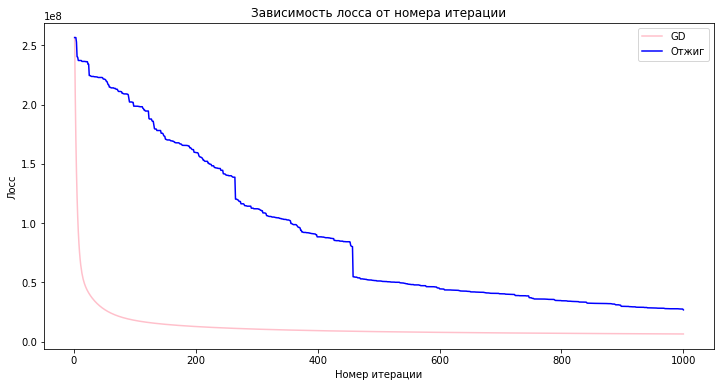

In [501]:
loss = MSELoss()
w_init = np.random.normal(0, 1, X.shape[1])
w_list_gd = gradient_descent(w_init, X_train, y_train, loss, 0.01, 1000)
w_list_an= annealing(X_train, y_train, loss)

loss_history_gd = []
loss_history_an = []

for i in range(1000):
    
    loss_history_gd.append(loss.calc_loss(X_train, y_train, w_list_gd[i]))
    loss_history_an.append(loss.calc_loss(X_train, y_train, w_list_an[i]))


fig, ax = plt.subplots(1, figsize = (12, 6))
ax.plot(np.arange(1, 1001), loss_history_gd, color='pink', label='GD')
ax.plot(np.arange(1, 1001), loss_history_an, color='blue', label='Отжиг')

ax.set(title = 'Зависимость лосса от номера итерации',
      xlabel = 'Номер итерации', ylabel = 'Лосс')
plt.legend(fontsize=10, loc='upper right')

plt.show()

Отжиг ведет себя забавнее gd - ему необходимо сильно больше операций, чтобы выравляться с gd, хотя эти "прыжки" вероятно и помогают избежать локального минимума

In [545]:
lin_reg_an = LinearRegression_annealing(MSELoss())
lin_reg_an.fit(X_train, y_train)

In [546]:

print(f"mse_train_lin_an: {mean_squared_error(y_train, lin_reg_an.predict(X_train))}" )
print(f"mse_test_lin_an: {mean_squared_error(y_test, lin_reg_an.predict(X_test))}" )
print()
print(f"mse_train_lin_gd: {mean_squared_error(y_train, lin_reg.predict(X_train))}")
print(f"mse_test_lin_gd: {mean_squared_error(y_test, lin_reg.predict(X_test))}")

mse_train_lin_an: 4041080.210340774
mse_test_lin_an: 5555832.8413914535

mse_train_lin_gd: 1645895.770901813
mse_test_lin_gd: 20290710.45556309


Отжиг лучше показывает себя на тесте + трейн и тест отжига не особо отличаются, на трэйне же  лучше показывает себя алгоритм с gd, но вообще ура - это лучший результат на тесте что у нас был (как на трейне тоже), время на алгоритм потрачено не зря